In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def load_data(url):
  df = pd.read_csv(url)
  df = df.drop(columns=['longitude','latitude'])
  data = np.array(df, dtype=float)
  normalize(data)
  return data[:,:6], data[:, -1]

In [ ]:
mu = []
std = []
def normalize(data):
  for i in range(0,data.shape[1]-1):
    data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))
    mu.append(np.mean(data[:,i]))
    std.append(np.std(data[:, i]))

In [ ]:
def h(x,theta):
	return np.matmul(x, theta)

In [ ]:
def cost_function(x, y, theta):
	return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0])

In [ ]:
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=30):
	m = x.shape[0]
	J_all = []
	
	for _ in range(num_epochs):
		h_x = h(x, theta)
		cost_ = (1/m)*(x.T@(h_x - y))
		theta = theta - (learning_rate)*cost_
		J_all.append(cost_function(x, y, theta))

	return theta, J_all 


In [ ]:
def plot_cost(J_all, num_epochs):
	plt.xlabel('Epochs')
	plt.ylabel('Cost')
	plt.plot(num_epochs, J_all, 'm', linewidth = "5")
	plt.show()

In [ ]:
def compare(y1,y2):
  x = np.arange(100)
  plt.plot(x, y1[:100,:], 'ro')
  plt.plot(x, y2[:100,:], 'bo')

In [ ]:
def main():
  x,y = load_data('https://raw.githubusercontent.com/virajkapurkar/Machine-Learning/main/data/california_housing_train.csv')
  y = np.reshape(y, (17000,1))
  x = np.hstack((np.ones((x.shape[0],1)), x))
  theta = np.zeros((x.shape[1], 1))
  learning_rate = 0.1
  num_epochs = 100
  theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
  J = cost_function(x, y, theta)
  print("Cost: ", J)
  print("Parameters: ", theta)

  #for testing and plotting cost 
  n_epochs = []
  jplot = []
  count = 0
  for i in J_all:
    jplot.append(i[0][0])
    n_epochs.append(count)
    count += 1
  jplot = np.array(jplot)
  n_epochs = np.array(n_epochs)
  plot_cost(jplot, n_epochs)

  xtest, ytest = load_data('https://raw.githubusercontent.com/virajkapurkar/Machine-Learning/main/data/california_housing_test.csv')
  ytest = np.reshape(ytest, (3000,1))
  xtest = np.hstack((np.ones((xtest.shape[0],1)), xtest))
  ypred = h(xtest, theta)
  compare(ytest, ypred)

Cost:  [[2.95729888e+09]]
Parameters:  [[207295.40615072]
 [ 25115.18122605]
 [-10211.86954387]
 [ 23125.62105342]
 [-29712.16427273]
 [ 26066.81663772]
 [ 84836.83580694]]


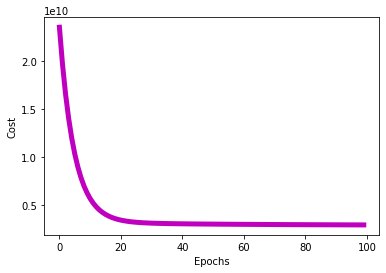

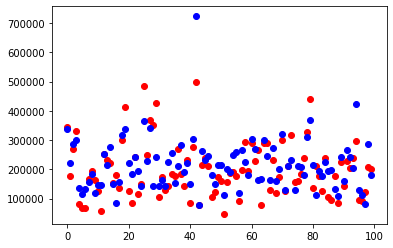

In [ ]:
main()